# 1. Global Earthquakes

In [1]:
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#定义默认字体为Times New Roman
plt.rcParams['font.family'] = 'serif'  
plt.rcParams['font.serif'] = ['Times New Roman']

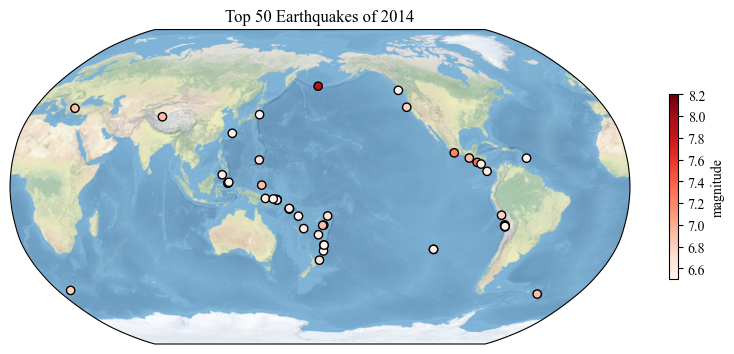

In [2]:
#读取csv数据
Sig_Eqs = pd.read_csv('usgs_earthquakes.csv')

#对震级'mag'进行降序排序，并提取经纬度和震级数据列
Eqs_mag_sort = Sig_Eqs.sort_values('mag', ascending=False)[['latitude', 'longitude', 'mag']]
#提取震级最大的50个地震数据
Eqs_mag_top50 = Eqs_mag_sort.head(50)
#print(Eqs_mag_top50)
#提取纬度、经度和震级
lats = Eqs_mag_top50['latitude'] #纬度
lons = Eqs_mag_top50['longitude'] #经度
mags = Eqs_mag_top50['mag'] #震级


#定义投影坐标
ccrs.PlateCarree()

#创建画图对象，并定义对象大小
plt.figure(figsize=(10,8), dpi=100)
#创建一个基础PlateCarree投影样式的轴
proj = ccrs.Robinson(central_longitude=180) #设置中央经线为180°
ax = plt.axes(projection=proj)

#添加地图底图
ax.stock_img(zorder=0)

#定义颜色映射
reds = plt.cm.Reds #导入红色颜色映射
norm = plt.Normalize(vmin=min(mags), vmax=max(mags)) #对震级数据进行标准化，设置颜色边界
colors = reds(norm(mags)) #定义归一化后的震级数据与红色的映射

#绘制数据点
ax.scatter(lons, lats, c=colors, edgecolors='black', transform=ccrs.PlateCarree())

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=reds, norm=norm) #创建一个ScalarMappable对象，它使用与散点图相同的cmap和norm
sm.set_array(np.linspace(min(mags), max(mags), 100)) #使用100个点来平滑地显示颜色范围
cbar = plt.colorbar(sm, ax=ax, label='magnitude', shrink=0.3) #添加颜色条到图形中
ticks = np.arange(6.6, 8.3, 0.2) #设置颜色条刻度数据
cbar.set_ticks(ticks) #设置颜色条的刻度

#添加图标题
plt.title('Top 50 Earthquakes of 2014')

#显示图片
plt.show()

# 2. Explore a netCDF dataset

In [3]:
#导入库
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#定义默认字体为Times New Roman
plt.rcParams['font.family'] = 'serif'  
plt.rcParams['font.serif'] = ['Times New Roman']

#读取数据文件，使用的是Assignment 03第一题的数据
ds2 = xr.open_dataset('200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', engine='netcdf4')

## 2.1

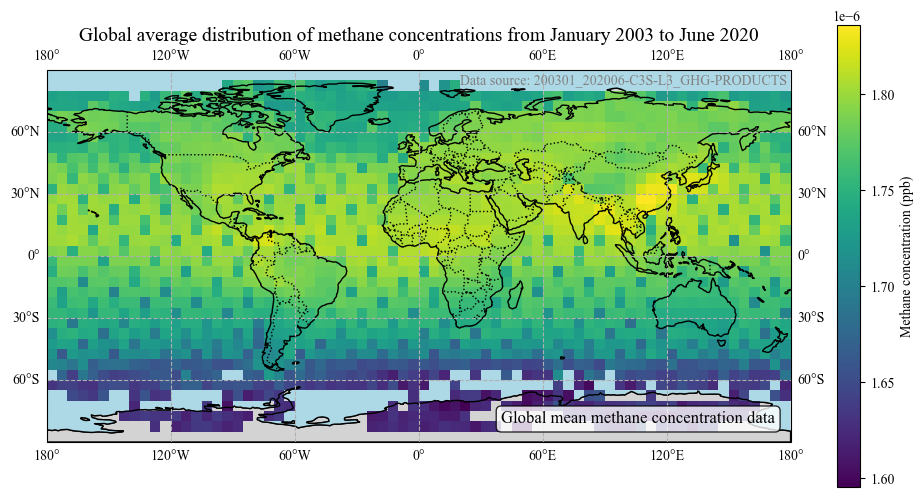

In [4]:
ch4 = ds2['xch4']  #读取甲烷数据
ch4_mean = ch4.mean(dim='time')  #计算时间维度的平均值

#创建画图对象，并定义投影坐标为PlateCarree
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ch4_mean.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Methane concentration (ppb)'})

#添加地理特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':') #国界
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray') #陆地
ax.add_feature(cfeature.OCEAN, facecolor='lightblue') #海洋

#添加标题、网格线和注释
ax.set_title("Global average distribution of methane concentrations from January 2003 to June 2020", fontsize=14) #图标题
ax.gridlines(draw_labels=True, linestyle='--') #网格线
plt.text(20, 83, "Data source: 200301_202006-C3S-L3_GHG-PRODUCTS", fontsize=10, color='gray') #注释

#添加文本框
props = dict(boxstyle='round', facecolor='white', alpha=0.8) #文本框样式
ax.text(40, -75, "Global mean methane concentration data", transform=ccrs.PlateCarree(),
        fontsize=12, verticalalignment='top', bbox=props) #文本框内容

plt.show()

## 2.2

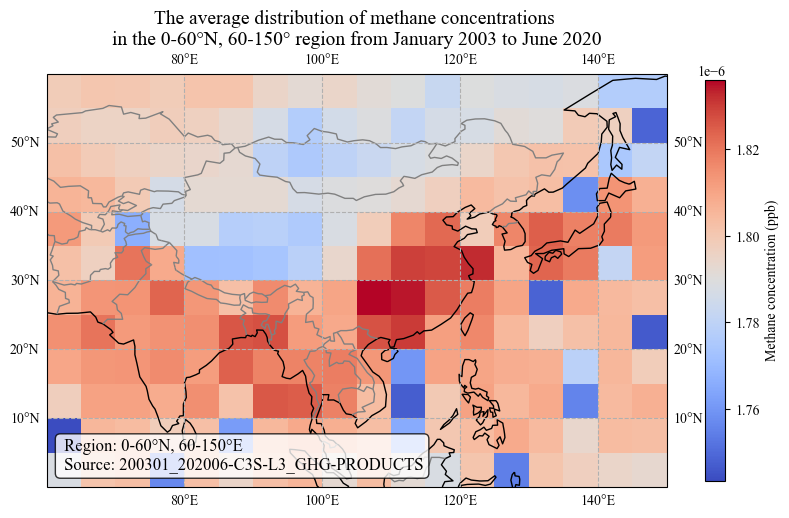

In [5]:
#创建区域地图0-60°N，60-150°E
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 8))
region = ch4_mean.sel(lat=slice(0, 60), lon=slice(60, 150))  #提取亚洲区域数据
region.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Methane concentration (ppb)', 'shrink':0.65})

#添加地理特征
ax.coastlines()
ax.add_feature(cfeature.BORDERS, edgecolor='gray') #国界
ax.add_feature(cfeature.LAND, facecolor='lightgreen', edgecolor='black') #陆地
ax.add_feature(cfeature.OCEAN, facecolor='lightblue') #海洋

#设置标题和网格线
ax.set_title("The average distribution of methane concentrations \nin the 0-60°N, 60-150° region from January 2003 to June 2020", fontsize=14)
ax.gridlines(draw_labels=True, linestyle='--')

#添加文本框
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(62, 7, " Region: 0-60°N, 60-150°E\n Source: 200301_202006-C3S-L3_GHG-PRODUCTS", transform=ccrs.PlateCarree(),
        fontsize=12, verticalalignment='top', bbox=props)

plt.show()